In [42]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# Import the requests library
import requests
# Import the API key.
from config import weather_api_key

In [44]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [45]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [46]:
coordinates = list(lat_lngs)

In [47]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-31.978121027595748 113.99242131810985
39.029886574449876 -171.08491429961796
30.50552888989634 109.06310377153
-11.600697620920272 175.4931844755535
28.00952322921607 -46.347189054354715
-17.628736913199305 -83.89464503448143
-6.921994614655631 -59.14320430174757
34.28623857950774 88.9258389710572
2.6220795346199424 -86.84281254993982
-50.925076543662755 -81.41458501327165
37.904615151367665 13.761647025293314
-81.78928885500252 -44.62252058630867
-8.300412761988667 83.20171997805573
52.59590014012164 -34.30244283777168
30.313528069132673 -82.10215001869453
-44.91716561309002 -71.49756793538113
69.91299192644533 -136.0790091193435
-34.32446924576257 -178.8562698447468
8.908880570047202 145.62494051806368
-55.56418893448998 65.2860078681291
31.00319258220209 171.58501018453438
-59.958254124820776 164.46300842056098
67.46666827035781 -84.00005880266012
-77.12867770087338 -61.46503544689824
-21.24283334536686 147.38993850056335
-84.13254374322685 109.41375689962314
60.9401149425189 83.92

In [48]:
from citipy import citipy

In [49]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [50]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [60]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 5 of Set 13 | kwinana
Processing Record 6 of Set 13 | kapaa
Processing Record 7 of Set 13 | lichuan
Processing Record 8 of Set 13 | asau
Processing Record 9 of Set 13 | codrington
Processing Record 10 of Set 13 | pisco
Processing Record 11 of Set 13 | jacareacanga
Processing Record 12 of Set 13 | lasa
Processing Record 13 of Set 13 | san cristobal
Processing Record 14 of Set 13 | punta arenas
Processing Record 15 of Set 13 | termini imerese
Processing Record 16 of Set 13 | ushuaia
Processing Record 17 of Set 13 | hithadhoo
Processing Record 18 of Set 13 | nanortalik
Processing Record 19 of Set 13 | lakeside
Processing Record 20 of Set 13 | coihaique
Processing Record 21 of Set 13 | aklavik
Processing Record 22 of Set 13 | vaini
Processing Record 23 of Set 13 | lorengau
Processing Record 24 of Set 13 | saint-philippe
Processing Record 25 of Set 13 | nikolskoye
Processing Record 26 of Set 13 | bluff
Processing Record 27 of Set 13 | attawapiskat
City not found. Skipping.

Processing Record 36 of Set 16 | peleduy
Processing Record 37 of Set 16 | barra dos coqueiros
Processing Record 38 of Set 16 | bemidji
Processing Record 39 of Set 16 | shahr-e kord
Processing Record 40 of Set 16 | east london
Processing Record 41 of Set 16 | quatre cocos
Processing Record 42 of Set 16 | san patricio
Processing Record 43 of Set 16 | haibowan
City not found. Skipping...
Processing Record 44 of Set 16 | talnakh
Processing Record 45 of Set 16 | noumea
Processing Record 46 of Set 16 | barentsburg
City not found. Skipping...
Processing Record 47 of Set 16 | los llanos de aridane
Processing Record 48 of Set 16 | sao joao da barra
Processing Record 49 of Set 16 | churapcha
Processing Record 50 of Set 16 | irbil
Processing Record 1 of Set 17 | tuktoyaktuk
Processing Record 2 of Set 17 | mozhaysk
Processing Record 3 of Set 17 | bowen
Processing Record 4 of Set 17 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 17 | the valley
Processing Record 6 of Set 17 

Processing Record 19 of Set 20 | buala
Processing Record 20 of Set 20 | korla
Processing Record 21 of Set 20 | constantine
Processing Record 22 of Set 20 | nouadhibou
Processing Record 23 of Set 20 | havelock
Processing Record 24 of Set 20 | miracema do tocantins
Processing Record 25 of Set 20 | srednekolymsk
Processing Record 26 of Set 20 | alekseyevsk
Processing Record 27 of Set 20 | abha
Processing Record 28 of Set 20 | sept-iles
Processing Record 29 of Set 20 | maumere
Processing Record 30 of Set 20 | sentyabrskiy
City not found. Skipping...
Processing Record 31 of Set 20 | del rio
Processing Record 32 of Set 20 | wilmington
Processing Record 33 of Set 20 | nantucket
Processing Record 34 of Set 20 | orange
Processing Record 35 of Set 20 | ilulissat
Processing Record 36 of Set 20 | college
Processing Record 37 of Set 20 | laramie
Processing Record 38 of Set 20 | qaqortoq
Processing Record 39 of Set 20 | beloha
Processing Record 40 of Set 20 | guasdualito
Processing Record 41 of Set 

Processing Record 5 of Set 24 | renala khurd
Processing Record 6 of Set 24 | valkla
Processing Record 7 of Set 24 | ferkessedougou
Processing Record 8 of Set 24 | marfino
Processing Record 9 of Set 24 | maymyo
Processing Record 10 of Set 24 | goure
Processing Record 11 of Set 24 | fallon
Processing Record 12 of Set 24 | axim
Processing Record 13 of Set 24 | tabiauea
City not found. Skipping...
Processing Record 14 of Set 24 | muros
Processing Record 15 of Set 24 | davila
Processing Record 16 of Set 24 | abu dhabi
Processing Record 17 of Set 24 | deep river
Processing Record 18 of Set 24 | lixourion
Processing Record 19 of Set 24 | zabaykalsk
Processing Record 20 of Set 24 | araguaina
Processing Record 21 of Set 24 | andilamena
Processing Record 22 of Set 24 | saquarema
Processing Record 23 of Set 24 | seguela
Processing Record 24 of Set 24 | alotau
City not found. Skipping...
Processing Record 25 of Set 24 | ati
Processing Record 26 of Set 24 | altay
Processing Record 27 of Set 24 | he

In [69]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Filipe,14.8961,-24.4956,72.90,79,52,13.22,CV,2022-05-21 18:36:19
1,Bundaberg,-24.8500,152.3500,64.22,98,100,3.00,AU,2022-05-21 18:32:15
2,Puerto Ayora,-0.7393,-90.3518,76.96,91,71,10.00,EC,2022-05-21 18:27:28
3,Cape Town,-33.9258,18.4232,59.11,79,0,2.30,ZA,2022-05-21 18:27:11
4,Ushuaia,-54.8000,-68.3000,42.46,65,40,11.50,AR,2022-05-21 18:27:14
5,Ussel,45.5500,2.3167,71.15,70,77,0.43,FR,2022-05-21 18:36:20
6,Rikitea,-23.1203,-134.9692,75.18,74,8,6.91,PF,2022-05-21 18:27:16
7,Yuzhno-Kurilsk,44.0306,145.8556,48.54,99,100,8.59,RU,2022-05-21 18:36:21
8,Sena Madureira,-9.0656,-68.6569,89.20,43,37,2.59,BR,2022-05-21 18:36:22
9,Camacha,33.0833,-16.3333,65.62,68,20,16.11,PT,2022-05-21 18:34:35


In [62]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [63]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [64]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

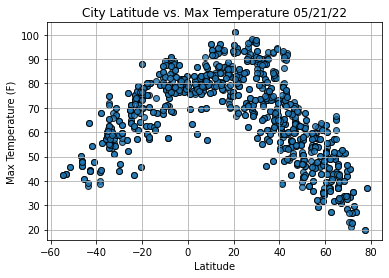

In [65]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

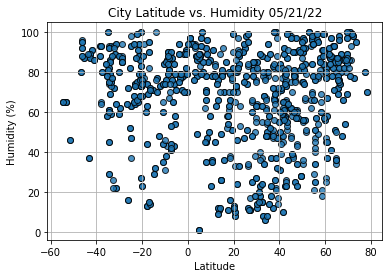

In [66]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

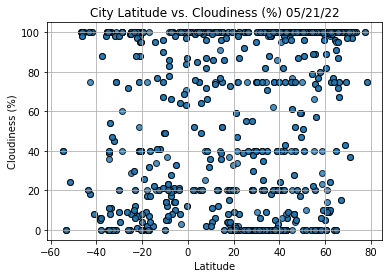

In [67]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

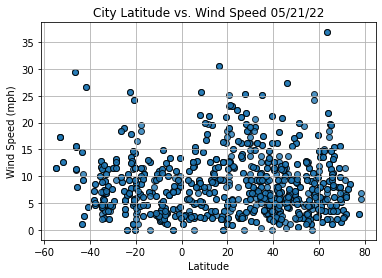

In [68]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()